In [1]:
%load_ext autoreload
%autoreload 2

# Weak Supervision VAE

Implementing some version of [Weak Supervision Variational Auto-Encoder](https://openreview.net/forum?id=0oDzoRjrbj) by Tonolini et al. 

There are some differences with the paper especially around the decoders and its still a work-in-progress as its mainly tested around the census data at the moment.

In [2]:
import os
import sys

os.chdir("../..")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import torch

import flippers
from examples.notebook_utils import load_wrench_dataset, MetricsMaker
from examples.Experiments._vae import WeakLabelVAE

M = {}

c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:149: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [19/19]: 100%|██████████| 19/19 [00:31<00:00,  1.67s/it, Loss=4.5]


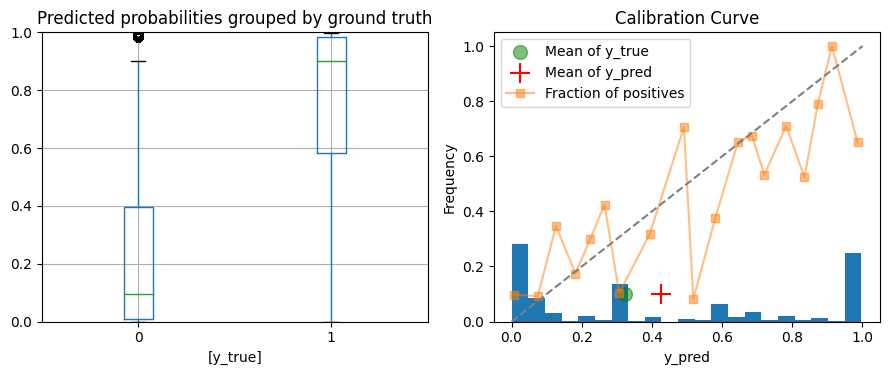

cdr {'F1': 0.681, 'Average_Precision': 0.633, 'AUC': 0.806, 'Accuracy': 0.764, 'Balanced_Accuracy': 0.768}


c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:149: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [6/6]: 100%|██████████| 6/6 [00:33<00:00,  5.63s/it, Loss=6.6] 


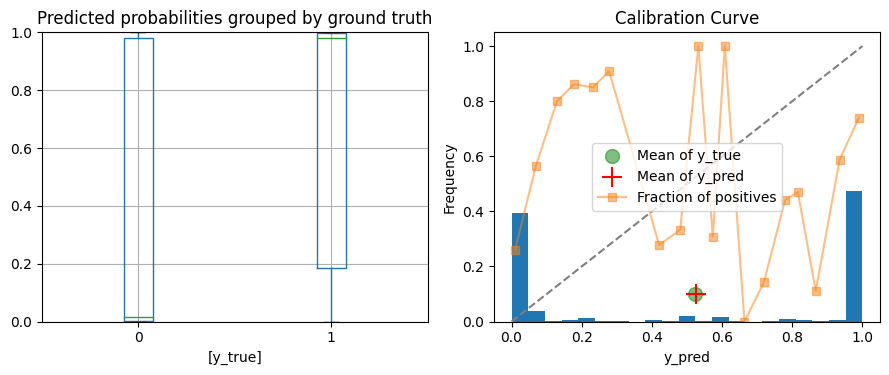

yelp {'F1': 0.709, 'Average_Precision': 0.797, 'AUC': 0.793, 'Accuracy': 0.697, 'Balanced_Accuracy': 0.696}


c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:149: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [95/95]: 100%|██████████| 95/95 [00:29<00:00,  3.17it/s, Loss=11.7]


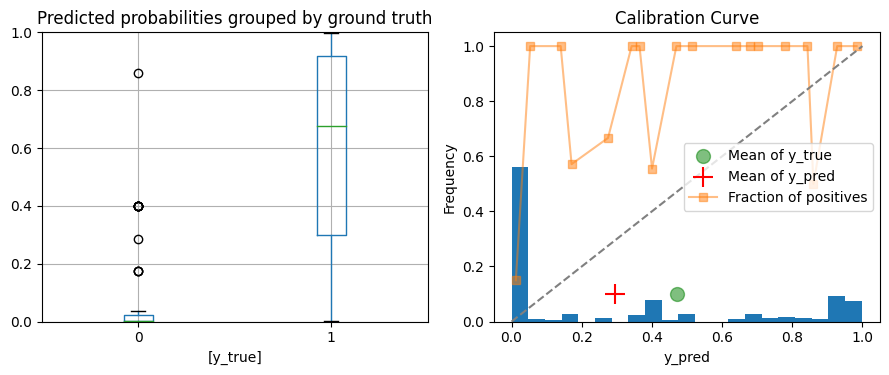

youtube {'F1': 0.734, 'Average_Precision': 0.93, 'AUC': 0.932, 'Accuracy': 0.8, 'Balanced_Accuracy': 0.789}


c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:149: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [16/16]: 100%|██████████| 16/16 [00:38<00:00,  2.40s/it, Loss=4.5]


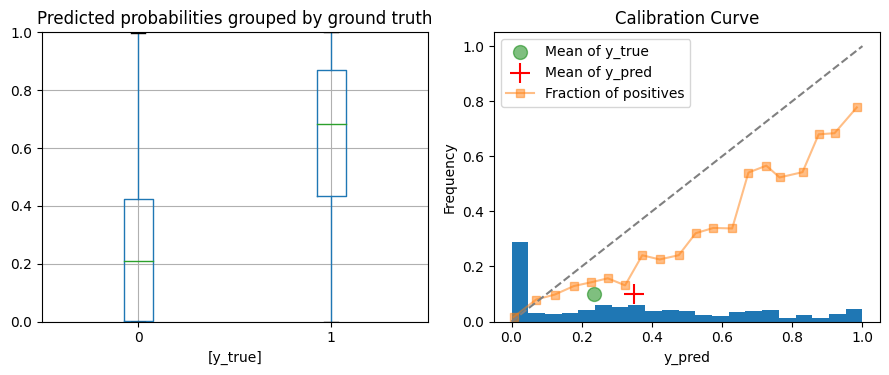

census {'F1': 0.606, 'Average_Precision': 0.607, 'AUC': 0.841, 'Accuracy': 0.788, 'Balanced_Accuracy': 0.754}


c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:149: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [8/8]: 100%|██████████| 8/8 [00:32<00:00,  4.01s/it, Loss=3.2] 


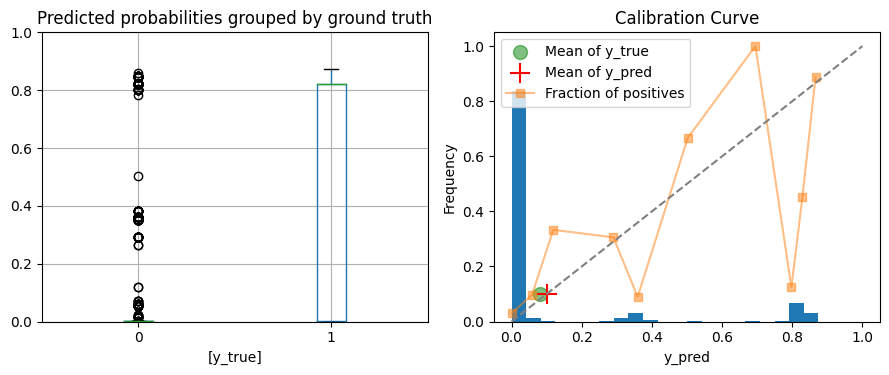

spouse {'F1': 0.511, 'Average_Precision': 0.38, 'AUC': 0.799, 'Accuracy': 0.912, 'Balanced_Accuracy': 0.757}


c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:149: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [9/9]: 100%|██████████| 9/9 [00:29<00:00,  3.25s/it, Loss=7.8] 


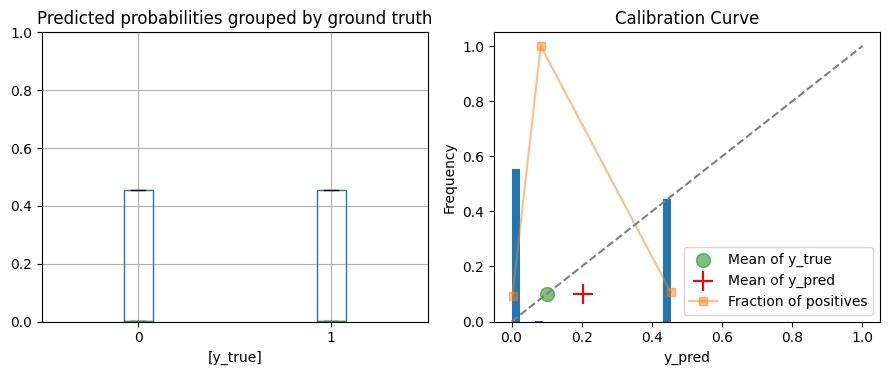

basketball {'F1': 0.0, 'Average_Precision': 0.104, 'AUC': 0.516, 'Accuracy': 0.899, 'Balanced_Accuracy': 0.5}


c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:149: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [36/36]: 100%|██████████| 36/36 [00:37<00:00,  1.03s/it, Loss=0.6]


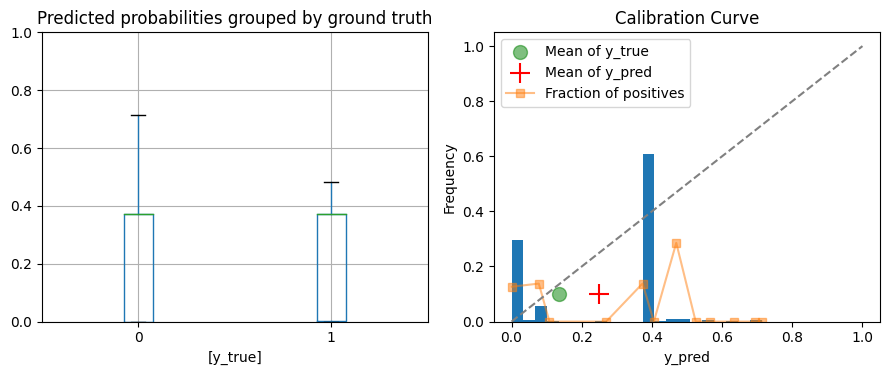

sms {'F1': 0.0, 'Average_Precision': 0.14, 'AUC': 0.516, 'Accuracy': 0.854, 'Balanced_Accuracy': 0.493}


c:\Users\liamt\Repos\flippers\flippers\_core\_core.py:149: UserWarning: Polarity mapping if not furnished.
Make sure L captures all possible values of each weak labelers.
  warnings.warn(
Epoch [23/23]: 100%|██████████| 23/23 [00:28<00:00,  1.26s/it, Loss=6.7]


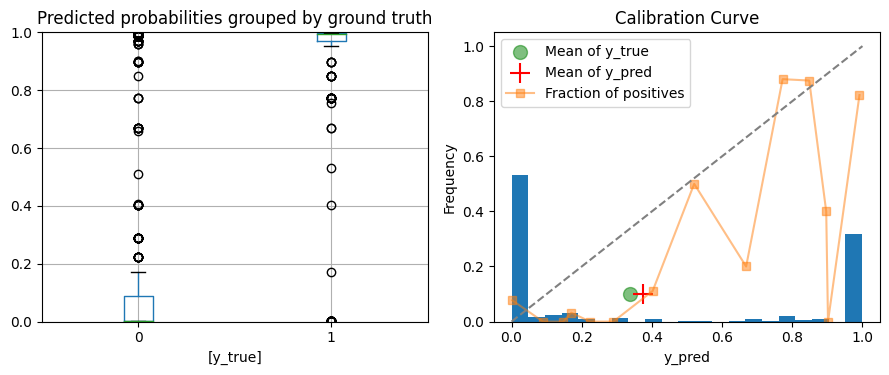

tennis {'F1': 0.832, 'Average_Precision': 0.786, 'AUC': 0.884, 'Accuracy': 0.882, 'Balanced_Accuracy': 0.879}


In [3]:
datasets = ["cdr", "yelp", "youtube", "census", "spouse", "basketball", "sms", "tennis"]
for dataset in datasets:
    data, weak_labels, polarities = load_wrench_dataset(dataset)
    train, dev, test = data
    L_train, L_dev, L_test = weak_labels
    class_balances = list(
        dev["label"].astype(int).value_counts(normalize=True).sort_index()
    )
    y_test = test["label"].astype(int).values
    Metrics = MetricsMaker(y_test, L_test)

    m = WeakLabelVAE(polarities=polarities, class_balances=class_balances, latent_dim=len(polarities))
    m.fit(L_train)
    M[dataset] = Metrics.score(m)
    print(dataset, M[dataset])

In [4]:
from examples.notebook_utils import dataset_to_metric

df = pd.DataFrame(M)


# Formatting function to underline entries
def underline_entries(x):
    is_metric = x.index == dataset_to_metric[x.name]
    return ["text-decoration: underline" if v else "" for v in is_metric]


# Underlines the metrics used in the wrench benchmark
df.style.apply(underline_entries).format("{:.3f}")

,cdr,yelp,youtube,census,spouse,basketball,sms,tennis
F1,0.681,0.709,0.734,0.606,0.511,0.000,0.000,0.832
Average_Precision,0.633,0.797,0.930,0.607,0.380,0.104,0.140,0.786
AUC,0.806,0.793,0.932,0.841,0.799,0.516,0.516,0.884
Accuracy,0.764,0.697,0.800,0.788,0.912,0.899,0.854,0.882
Balanced_Accuracy,0.768,0.696,0.789,0.754,0.757,0.500,0.493,0.879
